##Import Tools

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

##Loading Data

In [ ]:
data = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('/content/housing.csv', names=data, header=None, delimiter=r"\s+")

##Verifikasi Data

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.shape

(506, 14)

In [ ]:
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [ ]:
df.duplicated().any()

False

##Visualisasi Data

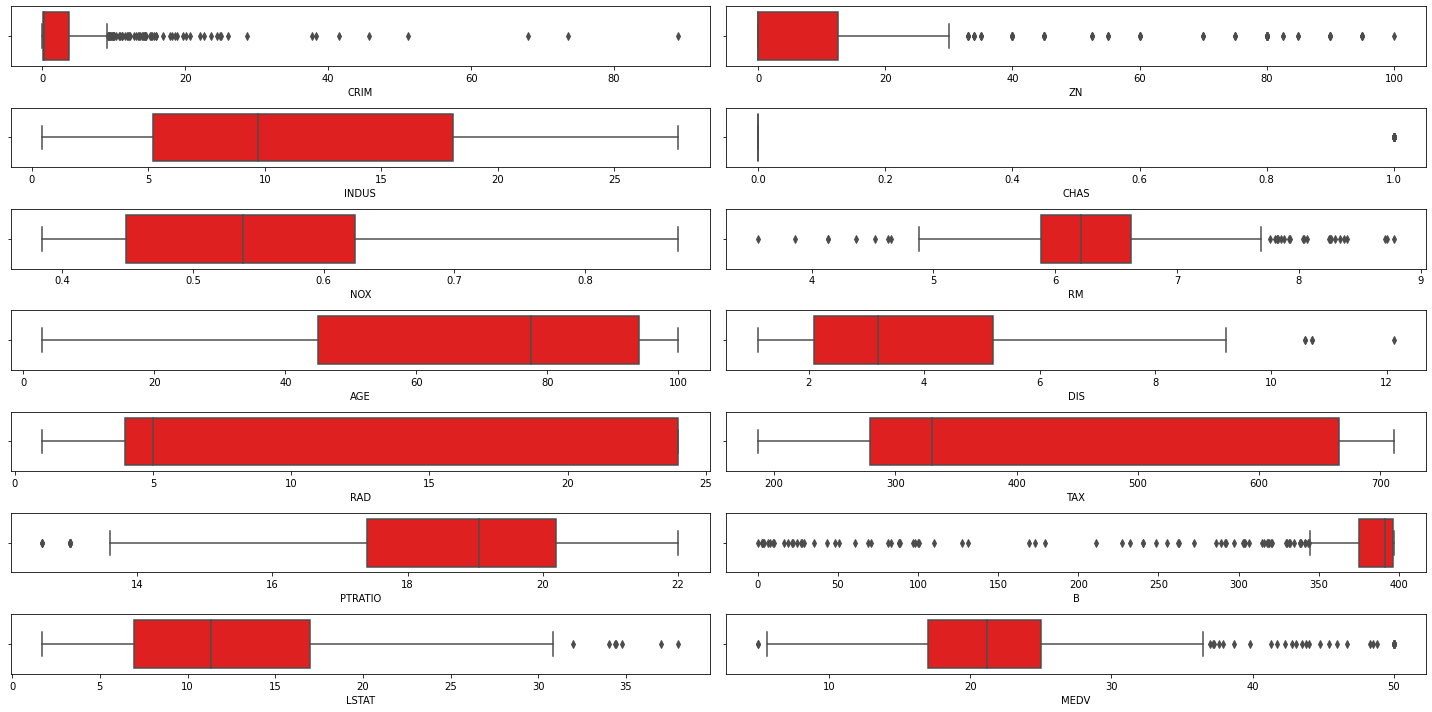

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(0, len(data)):
  plt.subplot(7, 2, i+1)
  sns.boxplot(df[data[i]], color='red')
  plt.tight_layout()

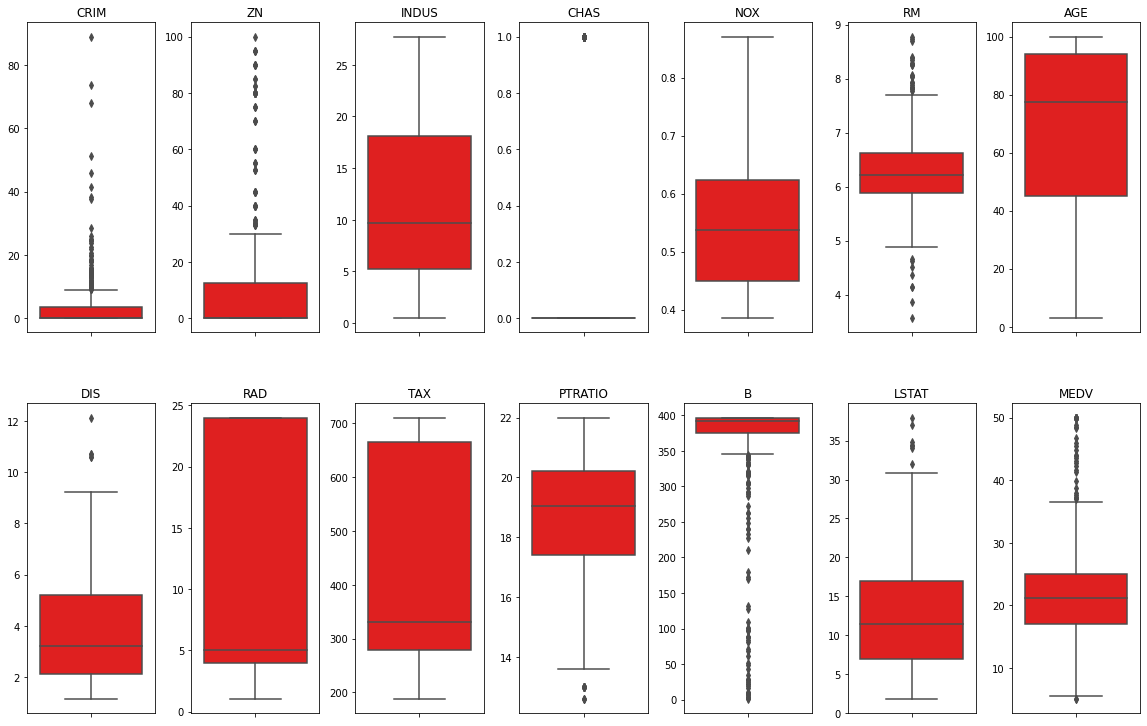

In [ ]:
fig, ax = plt.subplots(2, 7, figsize=(16, 10))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

for index, name in enumerate(df.columns):
    plot = sns.boxplot(y=df[name], 
                       ax=ax[index//7, index%7], color='red')
    plot.set(title=name)
    plot.set(ylabel=None)

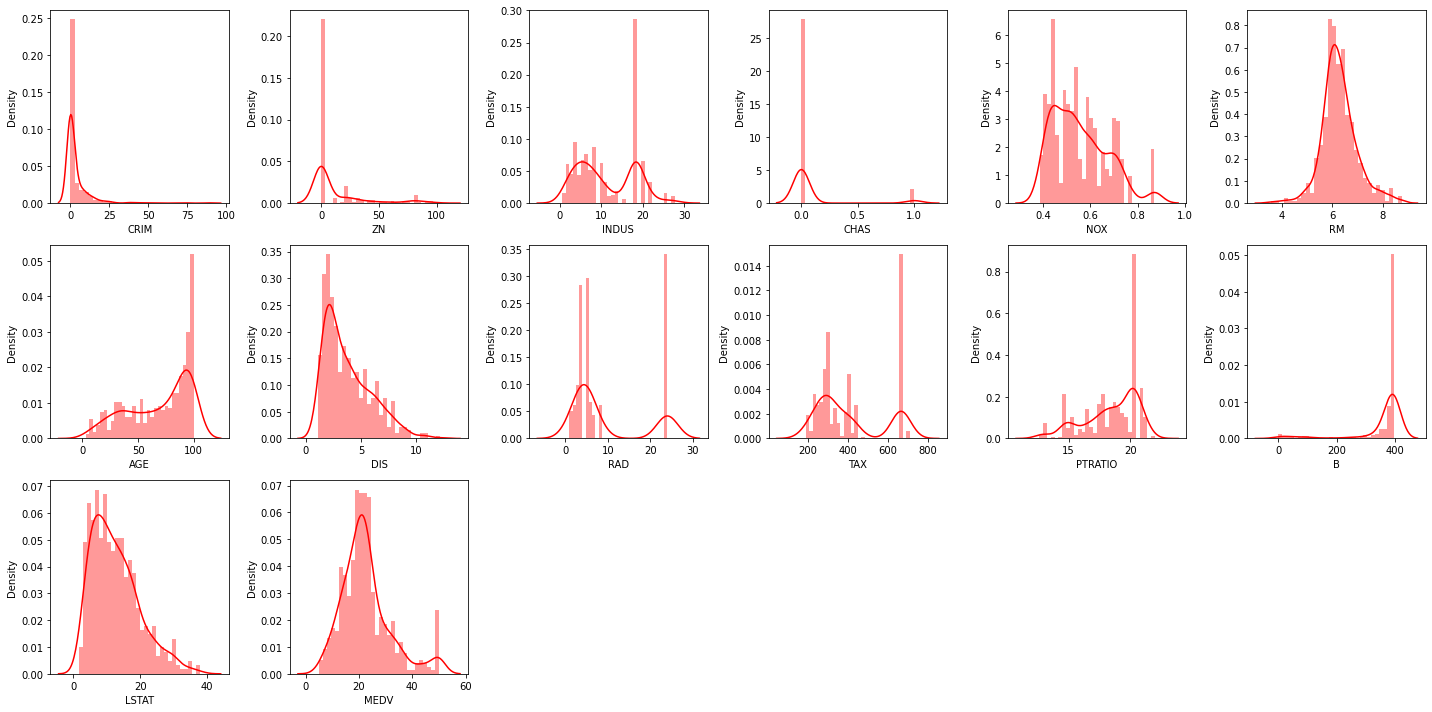

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(0, len(data)):
  plt.subplot(3, 6, i+1)
  sns.distplot(df[data[i]], color='red', bins=30)
  plt.tight_layout()

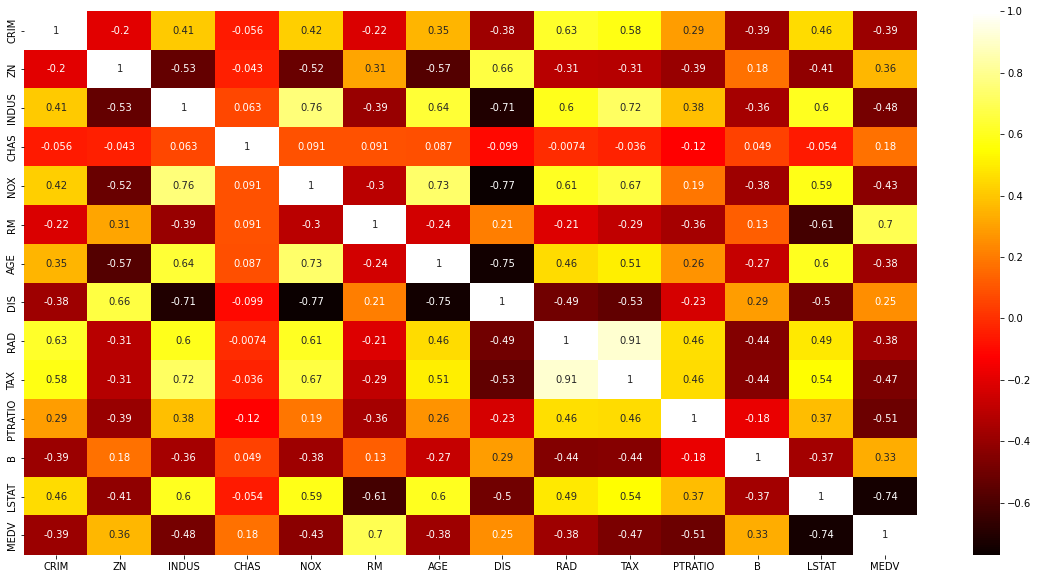

In [ ]:
#melakukan cek korelasi
korelasi = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(korelasi, cmap='hot', annot = True)
plt.show()

##Pre Processing

In [ ]:
mx = MinMaxScaler()

df['ZN'] = mx.fit_transform(df[['ZN']])
df['INDUS'] = mx.fit_transform(df[['INDUS']])
df['RM'] = mx.fit_transform(df[['RM']])
df['AGE'] = mx.fit_transform(df[['AGE']])
df['DIS'] = mx.fit_transform(df[['DIS']])
df['RAD'] = mx.fit_transform(df[['RAD']])
df['TAX'] = mx.fit_transform(df[['TAX']])
df['PTRATIO'] = mx.fit_transform(df[['PTRATIO']])
df['B'] = mx.fit_transform(df[['B']])
df['LSTAT'] = mx.fit_transform(df[['LSTAT']])
df['MEDV'] = mx.fit_transform(df[['MEDV']])

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,0.18,0.067815,0,0.538,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.02731,0.00,0.242302,0,0.469,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.02729,0.00,0.242302,0,0.469,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.03237,0.00,0.063050,0,0.458,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.06905,0.00,0.063050,0,0.458,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.00,0.420455,0,0.573,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.04527,0.00,0.420455,0,0.573,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.06076,0.00,0.420455,0,0.573,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.10959,0.00,0.420455,0,0.573,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


##Modeling

In [ ]:
x=df.drop(columns=['MEDV'])
y=df['MEDV'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 

In [ ]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.00,0.236437,0,0.448,0.499713,0.038105,0.417509,0.086957,0.087786,0.563830,0.965883,0.112583
58,0.15445,0.25,0.171188,0,0.453,0.495114,0.270855,0.607917,0.304348,0.185115,0.755319,0.984316,0.141556
385,16.81180,0.00,0.646628,0,0.700,0.328799,0.980433,0.026962,1.000000,0.914122,0.808511,1.000000,0.802428
78,0.05646,0.00,0.453446,0,0.437,0.511784,0.523172,0.353236,0.173913,0.402672,0.648936,0.973524,0.292770
424,8.79212,0.00,0.646628,0,0.584,0.383982,0.697219,0.084924,1.000000,0.914122,0.808511,0.008397,0.425773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,0.80,0.116569,0,0.392,0.443572,0.166838,0.735726,0.000000,0.244275,0.404255,0.995663,0.207506
72,0.09164,0.00,0.379399,0,0.413,0.479785,0.050463,0.378079,0.130435,0.225191,0.702128,0.984896,0.104581
396,5.87205,0.00,0.646628,0,0.693,0.544932,0.958805,0.049759,1.000000,0.914122,0.808511,1.000000,0.486755
235,0.33045,0.00,0.210411,0,0.507,0.483809,0.603502,0.229365,0.304348,0.229008,0.510638,0.949191,0.252483


In [ ]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
307,0.04932,0.330,0.063050,0,0.472,0.630006,0.694130,0.186698,0.260870,0.066794,0.617021,1.000000,0.160044
343,0.02543,0.550,0.121701,0,0.484,0.600690,0.550978,0.418527,0.173913,0.349237,0.531915,1.000000,0.150386
47,0.22927,0.000,0.236437,0,0.448,0.473079,0.850669,0.414644,0.086957,0.087786,0.563830,0.989510,0.471026
67,0.05789,0.125,0.205645,0,0.409,0.443955,0.190525,0.488174,0.130435,0.301527,0.670213,0.998260,0.175773
362,3.67822,0.000,0.646628,0,0.770,0.345085,0.960865,0.088570,1.000000,0.914122,0.808511,0.959378,0.233444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.04203,0.280,0.534457,0,0.464,0.552021,0.522142,0.230638,0.130435,0.158397,0.595745,0.995234,0.177428
224,0.31533,0.000,0.210411,0,0.504,0.901514,0.776519,0.160482,0.304348,0.229008,0.510638,0.970120,0.066501
110,0.10793,0.000,0.296921,0,0.520,0.504694,0.530381,0.149879,0.173913,0.375954,0.882979,0.991401,0.310982
426,12.24720,0.000,0.646628,0,0.584,0.436099,0.584964,0.078931,1.000000,0.914122,0.808511,0.061350,0.385210


##Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_train, y_train)

0.7293585058196337

In [ ]:
prediksilr = lr.predict(X_test)
prediksilr

array([ 0.61455626,  0.51318878,  0.28953374,  0.36614924,  0.30723197,
        0.33066617,  0.60933664,  0.29035506,  0.4316173 ,  0.48910618,
        0.48979578,  0.52782151,  0.35903949,  0.48560004,  0.40863021,
        0.34805361,  0.27401827,  0.73884747,  0.56678908,  0.08320816,
        0.35115642,  0.25029514,  0.44929015,  0.44115017,  0.58631922,
        0.12695801,  0.19565214,  0.25909564,  0.70058351,  0.21483345,
        0.35824776,  0.19901303,  0.84804672,  0.28834214,  0.37335911,
        0.34628774,  0.2799864 ,  0.49380515,  0.09914208,  0.32954751,
        0.42905597,  0.35967307,  0.54605237,  0.25207056,  0.31810737,
        0.2125207 ,  0.76019677,  0.29130834,  0.46471628,  0.34067084,
        0.44806267,  0.43176027,  0.44602739,  0.48134062, -0.00974416,
        0.42404163,  0.13081837,  0.48642815,  0.26346631,  0.68637875,
        0.32349641,  0.50042865,  0.25743025,  0.30612245,  0.13641619,
        0.60808725,  0.70507417,  0.37687213,  0.43509992,  0.44

In [ ]:
y_test

array([0.51555556, 0.42      , 0.25777778, 0.37777778, 0.35111111,
       0.4       , 0.50888889, 0.21111111, 0.36666667, 0.39111111,
       0.41555556, 0.58222222, 0.31777778, 0.32      , 0.32      ,
       0.50888889, 0.19777778, 1.        , 0.42444444, 0.21333333,
       0.24888889, 0.23555556, 0.41777778, 0.44444444, 0.41111111,
       0.07333333, 0.18888889, 0.27777778, 0.84666667, 0.14444444,
       0.42444444, 0.3       , 1.        , 0.16888889, 0.32888889,
       0.43333333, 0.22      , 0.69333333, 0.15333333, 0.31333333,
       0.39111111, 0.34888889, 0.55777778, 0.18444444, 0.21333333,
       0.07555556, 1.        , 0.17111111, 0.44444444, 0.30222222,
       0.55111111, 0.38222222, 0.52666667, 0.41777778, 0.06888889,
       0.38222222, 0.02888889, 0.38      , 0.27777778, 0.96222222,
       0.26      , 0.48      , 0.07777778, 0.21111111, 0.41555556,
       0.71555556, 0.81555556, 0.25555556, 0.37111111, 0.39333333,
       0.4       , 0.12222222, 0.37555556, 0.35555556, 0.34222

In [ ]:
r2_score(y_test, prediksilr)

0.7634174432138526

In [ ]:
lr.coef_

array([-0.00249749,  0.12901935,  0.01112985,  0.04733284, -0.43513558,
        0.35900476,  0.00960783, -0.36667972,  0.15607236, -0.12952218,
       -0.20659269,  0.0645218 , -0.43862077])

In [ ]:
lr.intercept_

0.713485290341423

##RMSE & R2 Score

In [ ]:
y_predict = lr.predict(x_train)
mse = mean_squared_error(y_train, y_predict)
r2 = r2_score(y_train, y_predict)

print(f'Hasil Performa training')
print(f'')
print(f'RMSE: {mse}')
print(f'R2 Score: {r2}')

Hasil Performa training

RMSE: 0.010796441834508445
R2 Score: 0.7293585058196337


In [ ]:
y_predict = lr.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'Hasil Performa testing')
print(f'')
print(f'RMSE: {mse}')
print(f'R2 Score: {r2}')

Hasil Performa testing

RMSE: 0.011546092089022063
R2 Score: 0.7634174432138526
